<a href="https://colab.research.google.com/github/brandiegriffin83/brandiegriffin83/blob/main/L04_Notebook_BrandyGriffin_ITAI2377.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ITAI 2377 Lab 04: Deep Learning Data Preprocessing

**Instructor:** [Your Name]
**Date:** [Date]

## Introduction

Welcome to Lab 04!  We'll explore the critical role of data preprocessing in deep learning. Even though models can extract features, preprocessing is essential for optimal performance. We'll cover various data types and apply preprocessing techniques. Resources in Google Colab are limited, so efficient coding is key!

## Why Preprocess?

Why preprocess when models extract features?

*   **Standardization:** Models need consistent data formats and ranges.
*   **Noise/Errors:** Raw data is messy. Preprocessing cleans it up.
*   **Efficiency:** Cleaner data means faster training.
*   **Results:** Good preprocessing helps models perform their best.

Think of preprocessing as a personal trainer for your model.

## Data Types and Preprocessing Techniques

### 1. Image Data



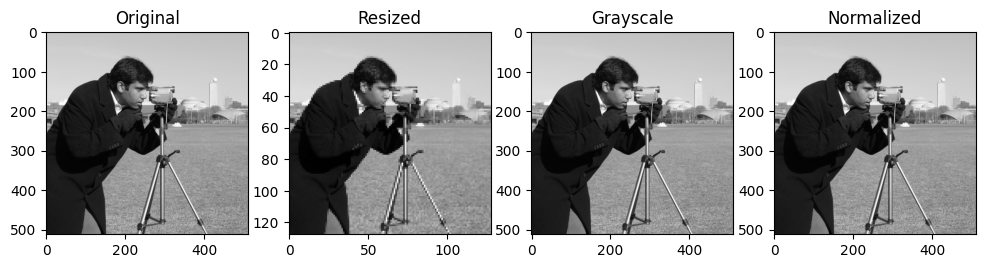

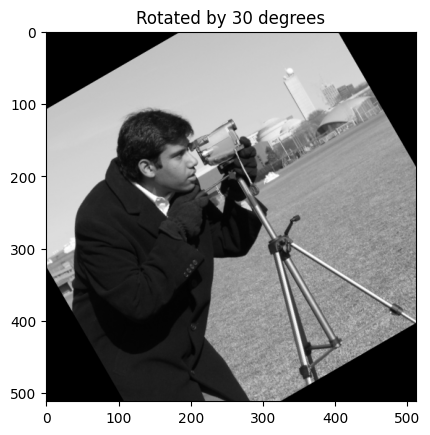

In [ ]:
import cv2
import numpy as np
from skimage import data, img_as_float
import matplotlib.pyplot as plt

# Load a sample image
image = data.camera()  # Grayscale image

# Resize the image to (128, 128)
resized_image = cv2.resize(image, (128, 128))

# Convert to grayscale (not needed, already grayscale)
gray_image = image

# Normalize pixel values to range [0,1]
normalized_image = img_as_float(image)

# Display images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1, 4, 2), plt.imshow(resized_image, cmap='gray'), plt.title("Resized")
plt.subplot(1, 4, 3), plt.imshow(gray_image, cmap='gray'), plt.title("Grayscale")
plt.subplot(1, 4, 4), plt.imshow(normalized_image, cmap='gray'), plt.title("Normalized")
plt.show()

# Data Augmentation (rotation by 30 degrees)
angle = 30
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated by 30 degrees")
plt.show()


### 2. Text Data



In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Ensure all required NLTK resources are downloaded
nltk.download('punkt', quiet=False)  # Download tokenizer models
nltk.download('stopwords', quiet=False)
nltk.download('wordnet', quiet=False)
# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

text = "This is a fun example sentence with stop words and punctuation!"

# Tokenization (lowercase)
tokens = word_tokenize(text.lower())

# Stop word removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if w not in stop_words and w not in string.punctuation]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]

print("Original:", text)
print("Tokens:", tokens)
print("Filtered:", filtered_tokens)
print("Lemmatized:", lemmatized_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original: This is a fun example sentence with stop words and punctuation!
Tokens: ['this', 'is', 'a', 'fun', 'example', 'sentence', 'with', 'stop', 'words', 'and', 'punctuation', '!']
Filtered: ['fun', 'example', 'sentence', 'stop', 'words', 'punctuation']
Lemmatized: ['fun', 'example', 'sentence', 'stop', 'word', 'punctuation']


### 3. Time Series Data



In [ ]:
import pandas as pd
import numpy as np

# Sample data (with a missing value)
data = {'Date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']),
        'Value': [10, 12, 15, np.nan, 18]}

df = pd.DataFrame(data)

# Fill missing values using backward fill (updated to avoid warning)
df['Value'] = df['Value'].bfill()

# Min-Max Normalization
min_val = df['Value'].min()
max_val = df['Value'].max()
df['Normalized'] = (df['Value'] - min_val) / (max_val - min_val)

print(df)

        Date  Value  Normalized
0 2024-01-01   10.0       0.000
1 2024-01-02   12.0       0.250
2 2024-01-03   15.0       0.625
3 2024-01-04   18.0       1.000
4 2024-01-05   18.0       1.000


### 4. Optional: Video Data (Simplified)



In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Use a sample video from OpenCV if no video is provided
try:
    # Try to load the sample video
    video_path = os.path.join(cv2.__path__[0], 'data', 'vtest.avi')

    if not os.path.exists(video_path):
        # If the sample video is not found, raise an exception
        raise FileNotFoundError(f"Sample video file not found at {video_path}.")

    cap = cv2.VideoCapture(video_path)

    # Check if OpenCV was able to open the video
    if not cap.isOpened():
        print("Error: Could not open sample video. ")
    else:
        ret, frame = cap.read()  # Read a single frame

        if ret:  # If a frame is successfully read
            resized_frame = cv2.resize(frame, (80, 60))  # Resize frame
            gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Display the frame
            plt.imshow(gray_frame, cmap='gray')
            plt.title("Video Frame (Grayscale)")
            plt.axis("off")
            plt.show()
        else:
            print("Error: Could not read a frame from the sample video.")

        cap.release()  # Release video capture

except FileNotFoundError as e:
    print(e)  # Print the error message if the sample video is not found
except Exception as e:
    print(f"An error occurred: {e}")

cv2.destroyAllWindows()

Sample video file not found at /usr/local/lib/python3.11/dist-packages/cv2/data/vtest.avi.


### 5. Optional: Audio Data (Simplified)



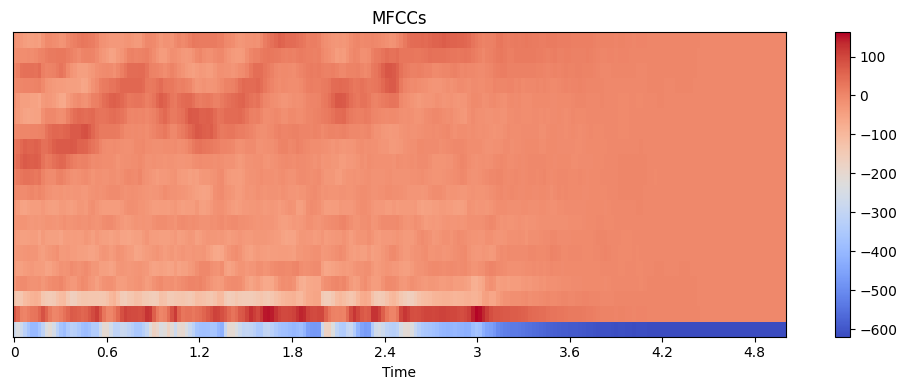

MFCCs shape: (20, 216)
Normalized MFCCs shape: (20, 216)


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the sample audio file 'trumpet' from Librosa
audio_path = librosa.ex('trumpet')  # Use a built-in Librosa example audio
y, sr = librosa.load(audio_path, duration=5)  # Load a maximum of 5 seconds

# Feature extraction (MFCCs - Extract 20 MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# Display MFCCs (optional)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

# Normalize MFCCs (example)
mfccs_normalized = (mfccs - np.mean(mfccs)) / np.std(mfccs)

print("MFCCs shape:", mfccs.shape)
print("Normalized MFCCs shape:", mfccs_normalized.shape)

**Tip:** Explore different methods for handling missing values (e.g., backward fill, interpolation).  Consider feature engineering techniques like creating lagged variables.

## Questions (Markdown Cell)

1.  Why is data preprocessing still important even with deep learning's feature extraction capabilities?
2.  Explain the difference between normalization and standardization. When would you choose one over the other?
3.  Describe a scenario where data augmentation would be particularly useful.
4.  What are some potential challenges or pitfalls to avoid during data preprocessing?  How can you mitigate them?
5.  Choose one of the data types covered in the lab (images, text, time series).  Describe a specific real-world application that uses deep learning and explain how preprocessing would be crucial for that application.

## Deliverables

*   **Completed Notebook (PDF):** This notebook with your code, outputs, and answers to the questions.
*   **Reflective Journal:** A short journal (1-2 pages) reflecting on your learning experience in this lab.  Consider the following prompts:
    *   What did you learn in this lab?
    *   What challenges did you encounter? How did you overcome them?
    *   Were there any concepts that you already knew?
    *   Did anything surprise you?
    *   What are some potential real-world applications of the preprocessing techniques you learned?
    *   What further learning or exploration would you like to pursue related to data preprocessing?

Remember to save your notebook with the outputs and convert it to PDF before submission. Good luck!
```

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119">https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119</a></li>
  </ol>
</div>